# Testing and Demo-ing the Markov Chain Monte Carlo

In [1]:
from mcmc import mmc
import matplotlib.pyplot as plt
import numpy as np

## Test on the normal distribution

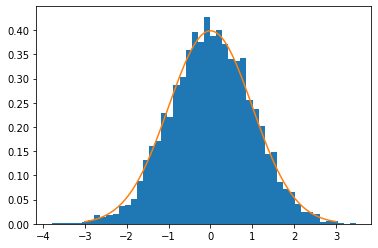

Sample mean: 0.019202938841796656
  std. dev.: 0.9724294140153367


In [20]:
num_samples = 10000

normal = lambda x : np.exp(-x**2/2) #normal distribution without constant in front
X = np.empty(num_samples); X[0] = 0 #initialize first point

#populate remaining part of array
for i in range(1,num_samples):
    X[i] = mmc(normal,X[i-1],delta=2)


plt.hist(X,bins=50,density=True)

#true distribution
plt.plot(np.linspace(-3,3,100),np.exp(-np.linspace(-3,3,100)**2/2) / (np.sqrt(2*np.pi)))
plt.show()
print(f"Sample mean: {np.mean(X)}")
print(f"  std. dev.: {np.std(X)}")


## A Pitfall: Unreachable Regions

Consider a normal distribution, but reject anything within 1 standard deviation of the center. We will notice that the walker never goes to the other side, since $\Delta < 2$, the size of the gap.

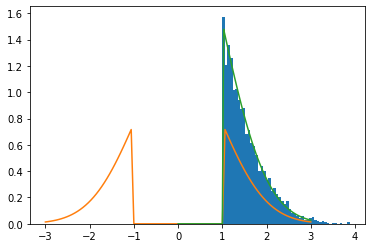

Sample mean: 1.5408788928800419
  std. dev.: 0.46023862054581394


In [27]:
num_samples = 10000

p = lambda x: np.exp(-x**2/2) * (abs(x) > 1)
X = np.empty(num_samples); X[0] = 2 #initialize first point

#populate remaining part of array
for i in range(1,num_samples):
    X[i] = mmc(p,X[i-1],delta=2)


plt.hist(X,bins=50,density=True)

#true distribution
plt.plot(np.linspace(-3,3,100),p(np.linspace(-3,3,100)) / (np.sqrt(2*np.pi)  * 0.3173))
#true distribution conditioned on x > 1:
plt.plot(np.linspace(0,3,100),p(np.linspace(0,3,100)) / (np.sqrt(2*np.pi) * 0.1587))
plt.show()
print(f"Sample mean: {np.mean(X)}")
print(f"  std. dev.: {np.std(X)}")